<a href="https://colab.research.google.com/github/Samia35-2973/Machine-Learning-Notes/blob/main/Multiclass_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split

# load digits contain 1797 handwritten digits of 8x8 images
from sklearn.datasets import load_digits

# for importing confusion matrix
from sklearn.metrics import confusion_matrix

# For understanding data with statistical graphics
import seaborn as sb

In [224]:
# calling method
digits = load_digits()

In [225]:
# see what this training set contains
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [226]:
# See what the data[0] of load_digits method contain out of 1797 samples
digits.data[1796]

# it will be 8x8 image but it will be represented in one dimension array

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

<Figure size 640x480 with 0 Axes>

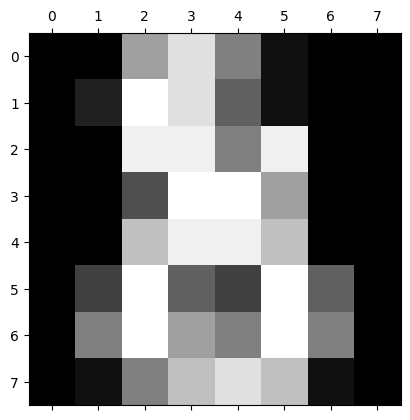

In [227]:
# to see the element call the matplotlib methods

# Set the colormap to gray
plt.gray()

# matshow visualizes a 2D matrix or array as color-coded image
plt.matshow(digits.images[1796])

In [228]:
# Target will show what the images actually corresponds

digits.target[0:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [229]:
# We can use data and target to train our model --> input and output

x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

In [230]:
len(x_train)

1437

In [231]:
len(x_test)

360

In [232]:
# Create model
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [233]:
model.score(x_test, y_test)

0.9555555555555556

In [234]:
# To predict we need a random sample
sample = digits.data[1796]
sample

array([ 0.,  0., 10., 14.,  8.,  1.,  0.,  0.,  0.,  2., 16., 14.,  6.,
        1.,  0.,  0.,  0.,  0., 15., 15.,  8., 15.,  0.,  0.,  0.,  0.,
        5., 16., 16., 10.,  0.,  0.,  0.,  0., 12., 15., 15., 12.,  0.,
        0.,  0.,  4., 16.,  6.,  4., 16.,  6.,  0.,  0.,  8., 16., 10.,
        8., 16.,  8.,  0.,  0.,  1.,  8., 12., 14., 12.,  1.,  0.])

In [235]:
digits.target[1796]

8

<Figure size 640x480 with 0 Axes>

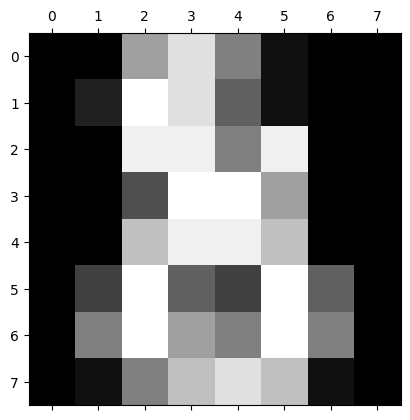

In [236]:
plt.gray()
plt.matshow(digits.images[1796])

In [237]:
model.predict([digits.data[1796]])

array([8])

In [238]:
# Our accuracy score is not perfect 1. So, how do we know on which part it's predicting wrong
# One of the way to deal is confusing matrix
# for that we need the predicted value and generate a 2d matrix with test value
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 36,  0,  2,  1,  0,  1,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 27,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 33,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 41,  0,  0],
       [ 0,  2,  1,  1,  0,  1,  0,  0, 29,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  1, 36]])

Text(95.72222222222221, 0.5, 'Test')

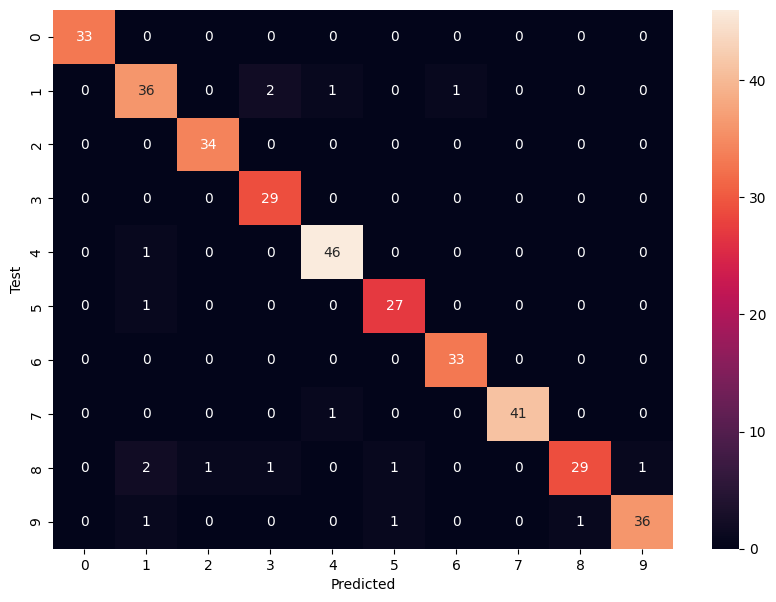

In [239]:
# It's not understable so plotting

plt.figure(figsize = (10, 7))
sb.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Test")

# In this plot without the diagonal if we don't see zero that means the model is not working riight
# for 4 it's predicting 1 one time.